<a href="https://colab.research.google.com/github/luckyl2829893-bot/ml-project/blob/main/svc_using_synthetic_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# this is used for uploading  files from local machine

# import google.colab
# from google.colab import (files)
# uploaded = files.upload()
# print(uploaded)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# for creating synthetic data
from sklearn.datasets import make_classification

In [ ]:
X,y=make_classification(n_samples=1000, n_features=3,n_classes=2, n_clusters_per_class=1,n_redundant=0) # keep in mind changing features location also changes the data

In [ ]:
#checking X data points
X

array([[ 0.14273128, -1.83269388,  0.01130164],
       [ 0.1989381 ,  0.31369583,  0.6602217 ],
       [-1.17250371,  0.93587388,  0.60699484],
       ...,
       [ 2.51776103,  0.26221898, -1.31631998],
       [ 0.28408149, -1.29865355,  0.82206824],
       [-0.37859846, -2.32571594, -1.14247084]])

In [ ]:
#checking y data points
y

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,

In [ ]:
pd.DataFrame(X)[0]

,0
0,0.142731
1,0.198938
2,-1.172504
3,-2.541822
4,-1.034456
...,...
995,-0.091214
996,-0.859482
997,2.517761
998,0.284081


<Axes: xlabel='0', ylabel='1'>

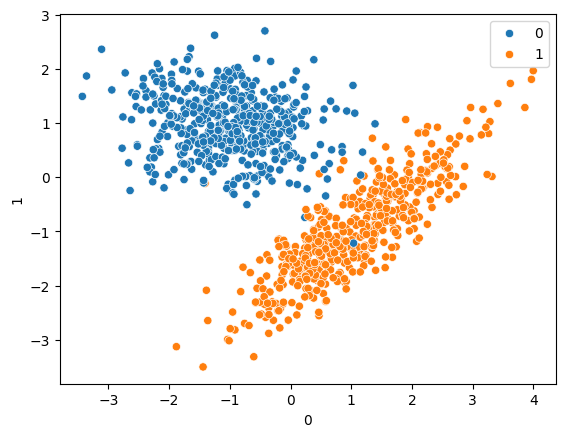

In [ ]:
# this was the error coming for doing this
# sns.scatterplot(pd.DataFrame(X)[0],pd.DataFrame(X)[1], hue=y )
#scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given
#so i did this to solve the issue
df=pd.DataFrame(X)
sns.scatterplot(x=df[0], y=df[1], hue=y)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=42)

In [ ]:
from sklearn.svm import SVC


In [ ]:
svc=SVC(kernel='linear')

In [ ]:
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred= svc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report ,confusion_matrix

In [ ]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       144
           1       0.97      0.99      0.98       156

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300

[[140   4]
 [  1 155]]


### using svm kernels rbf,poly,sigmoid to check which one gives best accuracy


In [ ]:
#rbf kernel
rbf= SVC(kernel='rbf')
rbf.fit(X_train,y_train)
y_pred1=rbf.predict(X_test)
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99       144
           1       0.98      1.00      0.99       156

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

[[141   3]
 [  0 156]]


In [ ]:
#poly kernel
polynomial= SVC(kernel='poly')
polynomial.fit(X_train,y_train)
y_pred2=rbf.predict(X_test)
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       144
           1       0.98      1.00      0.99       156

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

[[141   3]
 [  0 156]]


In [ ]:
#sigmoid kernel
Sigmoid= SVC(kernel='sigmoid')
Sigmoid.fit(X_train,y_train)
y_pred3=rbf.predict(X_test)
print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       144
           1       0.98      1.00      0.99       156

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

[[141   3]
 [  0 156]]


In [ ]:
# it show the data after converting to kernels is not challenging enough so it is giving the sane results

In [ ]:
from sklearn.model_selection import GridSearchCV
#defining parameter range
param_grid={'C':[0.1,1,10,100,1000],
            'gamma':[ 1,0.1,0.001,0.0001],
            'kernel':['rbf','poly','linear']}



In [ ]:
grid= GridSearchCV(SVC(),param_grid= param_grid,refit = True, cv=5, verbose=3)


In [ ]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.993 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.993 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.993 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.993 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.986 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.993 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.971 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'linear']},
             verbose=3)

In [ ]:
grid.best_params_# finding best parameter

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [ ]:
y_pred4=grid.predict(X_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       144
           1       0.97      1.00      0.98       156

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300

[[139   5]
 [  0 156]]
